Table of Content

1. Environment Setup
2. The laplace Distribution
3. Python Implementation
4. Appendix
5. Additional Reading and References

#Environment Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import laplace
import matplotlib.patches as mpatches



#The Laplace Distribution



The Laplace distribution, also known as the double exponential distribution, represents the distribution of the variances between two independent variables that follow identical exponential distributions.


Similar to the normal distribution, the Laplace distribution is unimodal, meaning it has a single peak, and it exhibits symmetrical behavior. However, it differs from the normal distribution mainly by having a sharper peak.

The Laplace distribution is specifically the distribution arising from the disparity between two independent random variables that adhere to identical exponential distributions.

This distribution finds utility in modeling scenarios where data demonstrates heavier tails or possesses a peak more pronounced than that of the normal distribution.

The Laplace distribution emerges as a consequence of two exponential distributions—one positive and one negative. It's sometimes referred to as the double exponential distribution due to its resemblance to two exponential distributions fused in a back-to-back manner.

The general formula for the PDF is:






>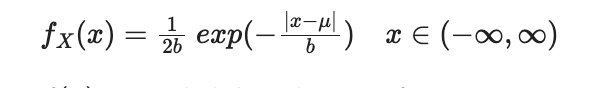

Where:



```E(X)= μ (any real number) is the location parameter

b > 0 = The scale Paremeter

Var(X) = 2b^2

Median(X)= μ

Mode(X) = μ

Skewness(X) = 0

Kurtosis(X) = 3
```

Note: With μ = 0 and b = 1, the positive half-line is an exact exponential distribution. The CDF is derived from integrating the pdf and can be written as:





>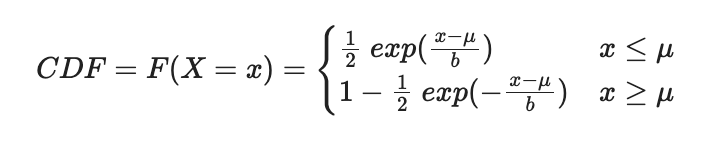

#Python Implementation


The code below is simply used to generate 10,000,000 random data points that follow a laplace distribution, then plotting the distribution using the location(loc) and scale paremeters

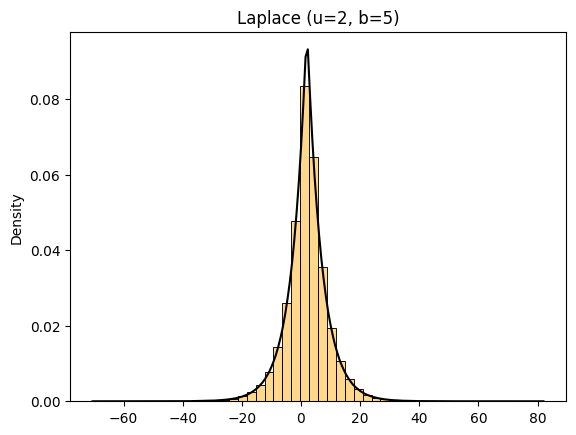

In [3]:
np.random.seed(1)
N = 10000000
u, b = [2, 5]

lap_data = np.random.laplace(loc=u, scale=b, size = N)
sns.histplot(lap_data, color='#ffcc66', stat='density', bins=50)
sns.kdeplot(lap_data, color='black')
plt.title(f'Laplace (u={u}, b={b})');

In [4]:
u, b = [2, 5]
print(f'The mean of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.mean(loc=u, scale=b), 4))
print(f'The median of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.median(loc=u, scale=b), 4))
print(f'The variance of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.var(loc=u, scale=b), 4))
print(f'The standard deviation of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.std(loc=u, scale=b), 4))
print(f'The skewness of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.stats(loc=u, scale=b, moments='mvsk')[2], 4))
print(f'The kurtosis of the Laplace(u={u}, b={b}) Distribution is: ', np.round(laplace.stats(loc=u, scale=b, moments='mvsk')[3], 4))

The mean of the Laplace(u=2, b=5) Distribution is:  2.0
The median of the Laplace(u=2, b=5) Distribution is:  2.0
The variance of the Laplace(u=2, b=5) Distribution is:  50.0
The standard deviation of the Laplace(u=2, b=5) Distribution is:  7.0711
The skewness of the Laplace(u=2, b=5) Distribution is:  0.0
The kurtosis of the Laplace(u=2, b=5) Distribution is:  3.0


In [5]:
#Fit a laplace distribution to the data and get the parameters
params = laplace.fit(lap_data)
print('u = ', params[0], ',', 'b = ', params[1])

u =  1.9980479365590247 , b =  5.000667183213817


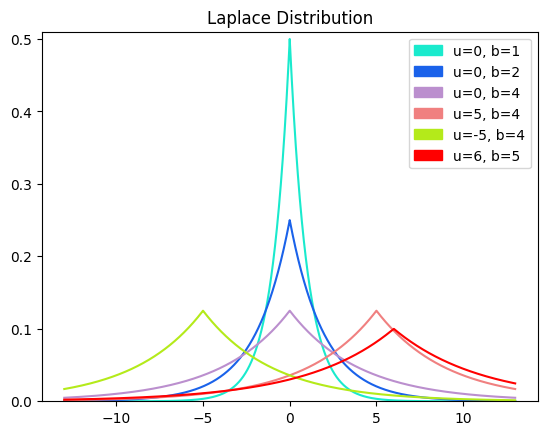

In [6]:
#Visualise the laplace with different params
np.random.seed(1)
N = 100000

#x axis from -13 to 13
x = np.linspace(-13, 13, N)

#Set the mean (loc) values to plot
u1, u2, u3, u4, u5, u6 = [0, 0, 0, 5, -5, 6]

#set scale values to plot
b1, b2, b3, b4, b5, b6 = [1, 2, 4, 4, 4, 5]

#Generate transformed data (y axis )
lap_data1 = laplace.pdf(x, loc = u1, scale = b1)
lap_data2 = laplace.pdf(x, loc = u2, scale = b2)
lap_data3 = laplace.pdf(x, loc = u3, scale = b3)
lap_data4 = laplace.pdf(x, loc = u4, scale = b4)
lap_data5 = laplace.pdf(x, loc = u5, scale = b5)
lap_data6 = laplace.pdf(x, loc = u6, scale = b6)

#Plot
plt.plot(x, lap_data1, color='#1AEACD')
plt.plot(x, lap_data2, color='#1A62EA')
plt.plot(x, lap_data3, color='#BB8FCE')
plt.plot(x, lap_data4, color='LightCoral')
plt.plot(x, lap_data5, color='#B4EA1A')
plt.plot(x, lap_data6, color='r')
patch1 = mpatches.Patch(color='#1AEACD', label=f'u={u1}, b={b1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'u={u2}, b={b2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'u={u3}, b={b3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'u={u4}, b={b4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'u={u5}, b={b5}')
patch6 = mpatches.Patch(color='r', label=f'u={u6}, b={b6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.ylim(0, 0.51)
plt.title('Laplace Distribution');

Integration of the pdf into CDF:


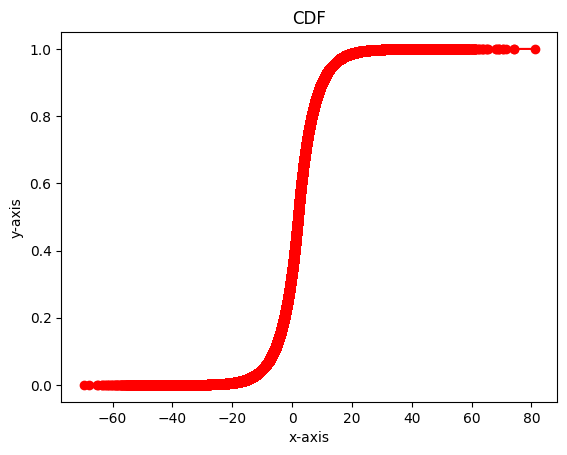

In [7]:
x = np.sort(lap_data)
N = 10000000
#Get the cdf values of y
y = np.arange(N) / float(N)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o');

Note: The cdf maps values to their percentile rank in the distribution

To find a point that has a right probability of
p use the code below:

``` laplace.isf(p, loc = u, scale = b) ```

To find a point that has a left probability of
 use the code below:

``` laplace.isf(1-p, loc = u, scale = b) ```


Given a location parameter (u) and a scale parameter (b),we can find the left and right probabilities of p




In [8]:
p = 0.8
u, b = [5, 2]
print(f'The point in the Laplace(u={u}, b={b}) Distribution that has a right probability of *{p}*: ', laplace.isf(p, loc = u, scale = b))
print(f'The point in the Laplace(u={u}, b={b}) Distribution that has a left probability of *{p}*: ', laplace.isf(1-p, loc = u, scale = b))


The point in the Laplace(u=5, b=2) Distribution that has a right probability of *0.8*:  3.1674185362516893
The point in the Laplace(u=5, b=2) Distribution that has a left probability of *0.8*:  6.83258146374831


To find the left probability of a point use the code below:

``` laplace.cdf(X, loc = u, scale = b) ```

To find the right probability of a point use the code below:

``` laplace.sf(X, loc = u, scale = b) ```



In [9]:
X = 1.5
u, b = [5, 2]
print(f'The left probability of *{X}* in the Laplace(u={u}, b={b}) Distribution is: ', laplace.cdf(X, loc = u, scale = b))
print(f'The Right probability of *{X}* in the Laplace(u={u}, b={b}) Distribution is: ', laplace.sf(X, loc = u, scale = b))

The left probability of *1.5* in the Laplace(u=5, b=2) Distribution is:  0.08688697172522257
The Right probability of *1.5* in the Laplace(u=5, b=2) Distribution is:  0.9131130282747775


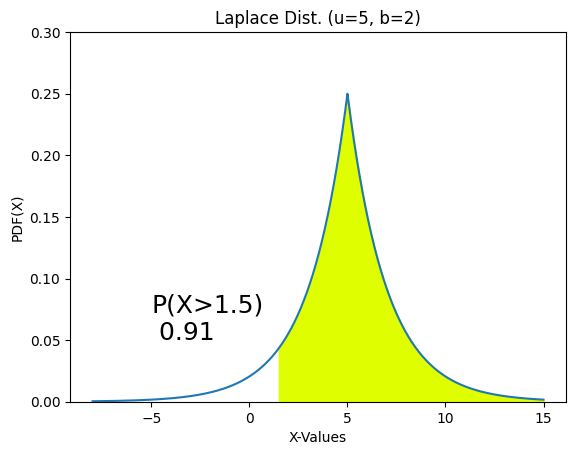

In [14]:
fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-8, 15, 0.001)
ax.plot(x, laplace.pdf(x, loc = u, scale = b))
ax.set_title(f'Laplace Dist. (u={u}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(X, 15, 0.001)
ax.set_ylim(0, 0.3)
ax.fill_between(px, laplace.pdf(px, loc = u, scale = b), color='#DFFF00')

prob = laplace.sf(X, loc = u, scale = b)
ax.text(-5, 0.05, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);


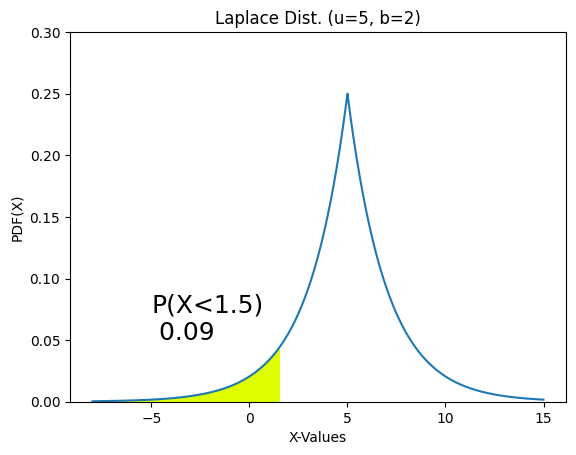

In [11]:
fig, ax = plt.subplots()

#Distribution curve
x= np.arange(-8, 15, 0.001)
ax.plot(x, laplace.pdf(x, loc = u, scale = b))
ax.set_title(f'Laplace Dist. (u={u}, b={b})')
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(-8, X, 0.001)
ax.set_ylim(0, 0.3)
ax.fill_between(px, laplace.pdf(px, loc = u, scale = b), color='#DFFF00')

prob = laplace.cdf(X, loc = u, scale = b)
ax.text(-5, 0.05, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

#Appendix




---

### Laplace Distribution

**Definition:**

The Laplace distribution, often termed the double exponential distribution, is a continuous probability distribution characterized by its symmetric bell-shaped curve with heavier tails than the normal distribution.

**Probability Density Function (PDF):**

The probability density function of the Laplace distribution with parameters μ  (location parameter) and  b  (scale parameter) is given by:
>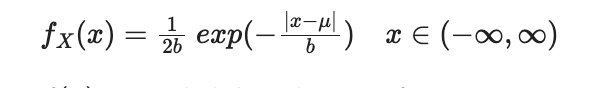

Where:

- x is the random variable.

- μ is the location parameter, representing the median or mean.

- β (b) is the scale parameter, governing the spread or width of the distribution.

**Properties:**

- Unimodal and symmetric, yet with heavier tails compared to the normal distribution.

- It exhibits a sharper peak than the normal distribution.

- Originates from the difference of two independent variables following identical exponential distributions.

- Sometimes referred to as the double exponential distribution due to its appearance resembling two exponential distributions merged back-to-back.

**Parameter Impact:**
- μ: Determines the location or central tendency of the distribution.

-b: Controls the scale or width of the distribution. Larger values broaden the distribution, smaller values narrow it.

**Applications:**

- Modeling phenomena with heavy-tailed data or sharper peaks than those described by the normal distribution.

- Utilized in fields such as finance, signal processing, and image processing.


---


#Additional Reading Resources & References

1. **[Laplace Distribution](https://doi.org/10.1007/978-0-387-32833-1_219)** (2008). In: *The Concise Encyclopedia of Statistics*. Springer, New York, NY.

2. **[Normal Approximation to Laplace Distribution](https://www.johndcook.com/blog/2019/02/05/normal-approximation-to-laplace-distribution/)** - John D. Cook.

3. **[An Empirical Study of The Laplace Distribution for Estimating](https://digitalcommons.usf.edu/cgi/viewcontent.cgi?article=3442&context=etd)** - University of South Florida.

4. **[Probability Density Function (PDF) of the Laplace Distribution](https://www.math.wm.edu/~leemis/chart/UDR/PDFs/Laplace.pdf)** - William & Mary University.

5. **[Double Exponential (Laplace) Distribution](https://mc-stan.org/docs/2_19/functions-reference/double-exponential-laplace-distribution.html)** - Stan Reference Manual.

6. **[The Oxford Companion to Philosophy](https://www.oxfordreference.com/display/10.1093/oi/authority.20110803100051604)** - Oxford Reference.

7. **[Probability Density Function of the Laplace Distribution](https://www.acsu.buffalo.edu/~adamcunn/probability/laplace.html)** - University at Buffalo.

8. **[Laplace Distribution: Definition, PDF, Examples](https://www.statisticshowto.com/laplace-distribution-double-exponential/)** - Statistics How To.
